In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(22)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
data['MSZoning'] = data['MSZoning'].map({'RL':1 , 'RM':2 , 'C (all)': 3, 'FV':4, 'RH':5})

In [6]:
# data[''] = data[''].map({})

In [7]:
data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [8]:
# data[''] = data[''].map({})

In [9]:
data['SaleCondition'] = data['SaleCondition'].map({'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6})

In [10]:
data['SaleType'] = data['SaleType'].map({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9})

In [11]:
data['PavedDrive'] = data['PavedDrive'].map({'Y':1, 'N':2, 'P':3})

In [12]:
data['Functional'] = data['Functional'].map({'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7})

In [13]:
data['KitchenQual'] = data['KitchenQual'].map({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4})

In [14]:
data['Electrical'] = data['Electrical'].map({'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5})

In [15]:
data['CentralAir'] = data['CentralAir'].map({'Y':1, 'N':2})

In [16]:
data['HeatingQC'] = data['HeatingQC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})

In [17]:
data['Heating'] = data['Heating'].map({'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6})

In [18]:
data['Foundation'] = data['Foundation'].map({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6})

In [19]:
data['ExterCond'] = data['ExterCond'].map({'TA':1, 'Gd':2, 'Fa':3, 'Po':4, 'Ex':5})

In [20]:
data['ExterQual'] = data['ExterQual'].map({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4})

In [21]:
data['Exterior2nd'] = data['Exterior2nd'].map({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,
       'CmentBd':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,
       'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16})

In [22]:
data['Exterior1st'] = data['Exterior1st'].map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,
       'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,
       'Stone':13, 'ImStucc':14, 'CBlock':15})

In [23]:
data['RoofStyle'] = data['RoofStyle'].map({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6})

In [24]:
data['HouseStyle'] = data['HouseStyle'].map({'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7,
       '2.5Fin':8})

In [25]:
data['RoofMatl'] = data['RoofMatl'].map({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,
       'Roll':7, 'ClyTile':8})

In [26]:
data['BldgType'] = data['BldgType'].map({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})

In [27]:
data['Condition2'] = data['Condition2'].map({'Norm':1, 'Artery':2, 'RRNn':3, 'Feedr':4, 'PosN':5, 'PosA':6, 'RRAn':7, 'RRAe':8})

In [28]:
data['Condition1'] = data['Condition1'].map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8,
       'RRNe':9})

In [29]:
data['Neighborhood'] = data['Neighborhood'].map({'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6,
       'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11, 'NAmes':12,
       'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18,
       'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24,
       'Blueste':25})

In [30]:
data['LandSlope'] = data['LandSlope'].map({'Gtl':1, 'Mod':2, 'Sev':3})

In [31]:
data['Utilities'] = data['Utilities'].map({'AllPub':1, 'NoSeWa':2})

In [32]:
data['LotConfig'] = data['LotConfig'].map({'Inside':1, 'FR2':2, 'Corner':3, 'CulDSac':4, 'FR3':5})

In [33]:
data['LandContour'] = data['LandContour'].map({'Lvl':1, 'Bnk':2, 'Low':3, 'HLS':4})

In [34]:
data['Street'] = data['Street'].map({'Pave':1 , 'Grvl':2})

In [35]:
data['LotShape'] = data['LotShape'].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})

In [36]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max()

0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotArea          1459 non-null int64
Street           1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
ExterQual        1459 non-null int64
Exter

/Users/midhunpk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


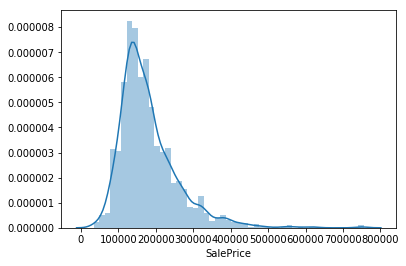

In [38]:
sns.distplot(data['SalePrice']);

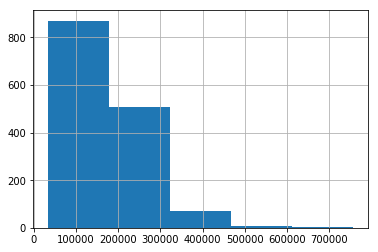

In [39]:
data['SalePrice'].hist(bins=5)

In [40]:
# X_train = data[:800]
# X_test = data[801:]

In [41]:
# X_train = X_train.drop('SalePrice',axis = 1)
# X_test = X_test.drop('SalePrice',axis = 1)

In [42]:
target_label = data['SalePrice'].values
target_label=target_label

In [43]:
data=data.drop('SalePrice',axis = 1)

In [44]:
len(data),len(target_label)

(1459, 1459)

In [45]:
train_X ,test_X ,train_y ,test_y = train_test_split(data, target_label, test_size=0.3, random_state=2018)

In [46]:
train_X.shape

(1021, 62)

In [47]:
train_y = train_y.reshape(1021,1)

In [48]:
RANDOM_SEED = 15
tf.set_random_seed(RANDOM_SEED)

In [49]:
def init_weights(shape):
    weights = tf.random_normal(shape,stddev=0.01)
    return tf.Variable(weights)

In [50]:
def forwardprop(X,w_1,w_2):
    h = tf.nn.sigmoid(tf.matmul(X,w_1))
    yhat = tf.matmul(h,w_2)
    return yhat

In [52]:
x_size = train_X.shape[1]   
h_size = 256                
y_size = train_y.shape[1] 

graph = tf.Graph()
with tf.Session(graph=graph) as sess:
  X = tf.placeholder("float", shape=[None, x_size])
  y = tf.placeholder("float", shape=[None, y_size])

In [53]:
def fc_layer(input, size_in, size_out, name="fc"):
  with tf.Session(graph=graph) as sess:
    with tf.name_scope(name):
      w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=0.1), name="W")
      b = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
      act = tf.matmul(input, w) + b
      tf.summary.histogram("weights", w)
      tf.summary.histogram("biases", b)
      tf.summary.histogram("activations", act)
      return act

In [54]:
with tf.Session(graph=graph) as sess:
  fc1 = fc_layer(X, 62, 256, 'fc1') 
  relu = tf.nn.relu(fc1)
  
  fc2 = fc_layer(relu, 256, 512, 'fc2') 
  relu = tf.nn.relu(fc2)
  
  fc3 = fc_layer(relu, 512, 256, 'fc2') 
  relu = tf.nn.relu(fc3)
  
  fc4 = fc_layer(relu, 256, 128, 'fc2') 
  relu = tf.nn.relu(fc4)
  
  logits = fc_layer(relu, 128, 1, "fc2")

In [55]:
with tf.Session(graph=graph) as sess:
    cost    = tf.reduce_mean(tf.square(y - logits))
    optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
    writer = tf.summary.FileWriter('./summary/main', sess.graph)

In [56]:
train_X.reset_index(drop=True, inplace=True)

In [57]:
train_y = train_y/1000000

In [58]:
def iterate_minibatches(inputs, targets, batchsize): #Using python generator
    assert inputs.shape[0] == targets.shape[0]
    m = inputs.shape[0] 
    indices = np.arange(m)
    np.random.shuffle(indices)
    for index in range(0, m - batchsize + 1, batchsize): # 1 is when SGD
        batch = indices[index:index + batchsize]
        yield inputs[batch], targets[batch]
    if m % batchsize != 0:
        batch = indices[math.floor(m/batchsize)*batchsize:m]
        yield inputs[batch], targets[batch]

In [59]:
with tf.Session(graph=graph) as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(200):
    for minibatch in iterate_minibatches(np.array(train_X), train_y, 64):
      minibatch_X, minibatch_Y = minibatch 
      sess.run(optimizer, feed_dict={X: minibatch_X, y: minibatch_Y})
      cos = sess.run(cost, feed_dict={X: minibatch_X, y: minibatch_Y})
    if epoch%50==0:
      print(cos) 
      
  saver = tf.train.Saver()
  saver.save(sess, "./saved_model/model")

479067.22
40.312386
159.00645
5.0267406


In [60]:
with tf.Session(graph=graph) as sess:
  sess.run(tf.global_variables_initializer())
  saver = tf.train.Saver()
  saver.restore(sess, './saved_model/model')
      
  pred = sess.run(logits, feed_dict={X: test_X})

INFO:tensorflow:Restoring parameters from ./saved_model/model


In [61]:
pred*1000000

array([[ 1.13722086e+06],
       [ 1.14965677e+06],
       [ 3.98266459e+06],
       [ 7.37425327e+05],
       [ 1.16325235e+06],
       [ 1.81014872e+06],
       [ 9.00724888e+05],
       [ 3.69154423e+05],
       [ 1.84930277e+06],
       [ 1.24044657e+06],
       [ 8.93095493e+05],
       [-7.14112759e+05],
       [-8.76000524e+03],
       [ 1.99980229e+05],
       [-5.15840054e+05],
       [-2.30165035e+05],
       [-5.91140091e+04],
       [ 1.86382914e+06],
       [ 1.78298044e+06],
       [-6.04218960e+05],
       [-1.92964107e+05],
       [-1.51370382e+06],
       [ 2.40591288e+06],
       [ 2.11422586e+06],
       [-3.78634787e+06],
       [-3.31921530e+06],
       [-1.68820333e+06],
       [ 1.90441751e+06],
       [ 9.00358677e+05],
       [ 1.52612162e+06],
       [-4.86405879e+05],
       [ 1.26217508e+06],
       [-2.10408163e+06],
       [-4.81355220e+05],
       [-7.56730556e+05],
       [-1.51643515e+06],
       [-7.24061489e+05],
       [ 2.38142461e+05],
       [ 2.4

In [84]:
test_y

array([105900, 163500, 135000, 214000, 115000, 154500, 172500, 178000,
       158500, 383970, 162500, 135000, 350000, 205000, 185000, 361919,
       194500, 275000, 136500, 127500, 269790, 165000, 207500, 158000,
       143000, 280000, 198500, 122000, 135000, 143500, 120500, 147000,
       145000, 260000, 219500, 161500,  95000, 188500, 112000, 142500,
       134000, 107900, 128500, 167500, 147000, 129000, 159434, 446261,
       190000, 115000, 237000, 133000, 105000, 141000, 118000, 143000,
       190000, 177500, 325000, 173900, 118500, 229000, 116000, 207500,
        90000, 121600, 163990, 130000, 165000, 174000, 451950, 220000,
       142125, 107000, 385000, 124000,  82500, 115000, 187500, 128000,
       158000, 370878, 161000, 410000,  90000, 205950, 145900, 184000,
       124500,  93500, 180000, 102776, 125000, 153000, 240000, 175500,
       254900,  80000, 134000, 157000, 257000, 274000, 137500, 132250,
       424870, 285000, 148500, 582933, 219210, 208500, 160000, 135500,
      

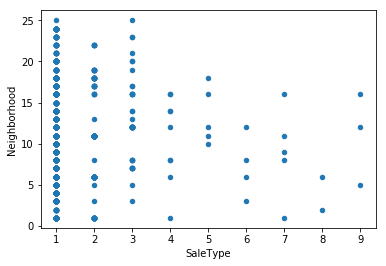

In [74]:
data.plot.scatter(x=60, y=10)

In [85]:
x = pd.DataFrame(pred)
y = pd.DataFrame(test_y)

In [106]:
x.shape


(438, 1)

In [107]:
y.shape

(438, 1)

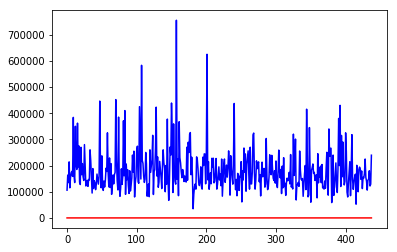

In [113]:
plt.plot(x, 'r') 
plt.plot(y, 'b') 
plt.show()